# Formative Assessment

### The goal

The goal of the assignment is to predict active power of a wind turbine using several input features. The data comes from a wind farm in France, [La Haute Borne Data (2013-2016)](https://opendata-renewables.engie.com/explore/dataset/la-haute-borne-data-2013-2016/table/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxhLWhhdXRlLWJvcm5lLWRhdGEtMjAxMy0yMDE2Iiwib3B0aW9ucyI6e319LCJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiYmFfYXZnIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzY2YzJhNSJ9XSwieEF4aXMiOiJkYXRlX3RpbWUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJ5ZWFyIiwic29ydCI6IiJ9XX0%3D). A total of 139 features are included in the dataset, with several measures of the same feature. For instance, the active power feature is split into the following measurements: `P_min, P_max, P_avg, P_std`. 

The overall tasks are the following:

1. Use a random forest regressor to predict power output. 
2. Perform dimension reduction using PCA.
2. Perform cross validation to determine how well the model generalises. 
3. Determine the importance of the features.
4. Determine the performance of the models as well.

The notebook will guide you as to how to go about fulfilling these overall tasks by doing other smaller subtasks.

Note that the dataset is very large, with 139 columns, so using a bit of domain knowledge we identified the following features that could be using in predicting wind turbine power output. Add to the feature subset as you build the model.



### Load the data

Import the necessary libraries and load the data. Once loaded, investigate the data. There are two files: `data_description.csv` lists the variables or features of the dataset. The file `wind-data.csv` contains the data (`wind-data-truncated.csv` if downloaded from the LMS, due to file size limits).

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

Load both the `data_description.csv` and `wind-data.csv` files.

In [60]:
# Loading wind-data-truncted.csv as data

data = pd.read_csv('wind-data-truncated.csv', parse_dates=['Date_time'])

In [61]:
data.head(5)

,Unnamed: 0,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,804808,R80711,2013-04-06 14:20:00,-0.940000,-0.950000,-0.940000,0.0,10.59,10.000000,11.0,...,NaN,NaN,358.870000,NaN,NaN,NaN,351.670010,NaN,NaN,NaN
1,732424,R80711,2015-12-22 14:30:00,-0.990000,-0.990000,-0.990000,0.0,17.00,17.000000,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,312987,R80711,2016-03-20 20:40:00,-0.990000,-0.990000,-0.990000,0.0,12.88,12.000000,13.0,...,NaN,NaN,44.849998,NaN,NaN,NaN,44.849998,NaN,NaN,NaN
3,68152,R80711,2016-01-09 01:00:00,45.000000,45.000000,45.000000,0.0,12.95,12.000000,13.0,...,NaN,NaN,243.020000,NaN,NaN,NaN,243.020000,NaN,NaN,NaN
4,231878,R80721,2014-12-14 13:20:00,44.990002,44.990002,44.990002,0.0,16.99,16.110001,17.0,...,NaN,NaN,195.060000,NaN,NaN,NaN,308.239990,NaN,NaN,NaN


In [62]:
data.shape

(25000, 139)

__Helpful hint__: Load the data into a dataframe. Use the `parse_dates=['Date_time']` argument in the `read_csv` function in order to display dates in later plots.

In [63]:
# Loading data_description.csv as description

description = pd.read_csv('data_description.csv', sep=';')

In [64]:
description.head()

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Va2,Vane_position_2,deg,Second wind vane on the nacelle
1,Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
2,Ws,Wind_speed,m/s,Average wind speed
3,Wa_c,Absolute_wind_direction_corrected,deg,NaN
4,Na_c,Nacelle_angle_corrected,deg,NaN


In [65]:
description.shape

(34, 4)

### Explore the data

Once you've loaded the data into a pandas dataframe, explore the data. You may start by generating summary statistics, identifying any missing values, and filling in missing values. Generate visualizations of the features as a way to start understanding the distribution of the data.

In [66]:
(data.iloc[:, 2:] == -200.0).sum()

Date_time     0
Ba_avg        0
Ba_min        0
Ba_max        0
Ba_std        0
Rt_avg        0
Rt_min        0
Rt_max        0
Rt_std        0
DCs_avg       0
DCs_min       0
DCs_max       0
DCs_std       0
Cm_avg        0
Cm_min        0
Cm_max        0
Cm_std        0
P_avg         0
P_min         0
P_max         0
P_std         0
Q_avg         0
Q_min         0
Q_max         0
Q_std         0
S_avg         0
S_min         0
S_max         0
S_std         0
Cosphi_avg    0
             ..
Nf_max        0
Nf_std        0
Nu_avg        0
Nu_min        0
Nu_max        0
Nu_std        0
Rs_avg        0
Rs_min        0
Rs_max        0
Rs_std        0
Rbt_avg       0
Rbt_min       0
Rbt_max       0
Rbt_std       0
Rm_avg        0
Rm_min        0
Rm_max        0
Rm_std        0
Pas_avg       0
Pas_min       0
Pas_max       0
Pas_std       0
Wa_c_avg      0
Wa_c_min      0
Wa_c_max      0
Wa_c_std      0
Na_c_avg      0
Na_c_min      0
Na_c_max      0
Na_c_std      0
Length: 137, dtype: int6

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 139 entries, Unnamed: 0 to Na_c_std
dtypes: datetime64[ns](1), float64(136), int64(1), object(1)
memory usage: 26.5+ MB


In [68]:
data.isnull().sum()

Unnamed: 0               0
Wind_turbine_name        0
Date_time                0
Ba_avg                 137
Ba_min                 137
Ba_max                 137
Ba_std                 137
Rt_avg                 137
Rt_min                 137
Rt_max                 137
Rt_std                 137
DCs_avg                137
DCs_min                137
DCs_max                137
DCs_std                137
Cm_avg                 137
Cm_min                 137
Cm_max                 137
Cm_std                 137
P_avg                  137
P_min                  137
P_max                  137
P_std                  137
Q_avg                  137
Q_min                  137
Q_max                  137
Q_std                  137
S_avg                  137
S_min                  137
S_max                  137
                     ...  
Nf_max                 137
Nf_std                 137
Nu_avg                 137
Nu_min                 137
Nu_max                 137
Nu_std                 137
R

In [69]:
data.columns

Index(['Unnamed: 0', 'Wind_turbine_name', 'Date_time', 'Ba_avg', 'Ba_min',
       'Ba_max', 'Ba_std', 'Rt_avg', 'Rt_min', 'Rt_max',
       ...
       'Pas_max', 'Pas_std', 'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std',
       'Na_c_avg', 'Na_c_min', 'Na_c_max', 'Na_c_std'],
      dtype='object', length=139)

In [70]:
data = data.fillna(data.median(axis=0))

In [71]:
#check to see if missung data still exist

data.isnull().sum()

Unnamed: 0               0
Wind_turbine_name        0
Date_time                0
Ba_avg                   0
Ba_min                   0
Ba_max                   0
Ba_std                   0
Rt_avg                   0
Rt_min                   0
Rt_max                   0
Rt_std                   0
DCs_avg                  0
DCs_min                  0
DCs_max                  0
DCs_std                  0
Cm_avg                   0
Cm_min                   0
Cm_max                   0
Cm_std                   0
P_avg                    0
P_min                    0
P_max                    0
P_std                    0
Q_avg                    0
Q_min                    0
Q_max                    0
Q_std                    0
S_avg                    0
S_min                    0
S_max                    0
                     ...  
Nf_max                   0
Nf_std                   0
Nu_avg                   0
Nu_min                   0
Nu_max                   0
Nu_std                   0
R

In [72]:
data.dtypes

Unnamed: 0                    int64
Wind_turbine_name            object
Date_time            datetime64[ns]
Ba_avg                      float64
Ba_min                      float64
Ba_max                      float64
Ba_std                      float64
Rt_avg                      float64
Rt_min                      float64
Rt_max                      float64
Rt_std                      float64
DCs_avg                     float64
DCs_min                     float64
DCs_max                     float64
DCs_std                     float64
Cm_avg                      float64
Cm_min                      float64
Cm_max                      float64
Cm_std                      float64
P_avg                       float64
P_min                       float64
P_max                       float64
P_std                       float64
Q_avg                       float64
Q_min                       float64
Q_max                       float64
Q_std                       float64
S_avg                       

Because we are investigating power output, the active power feature is given by the following features in  the dataset: `P_avg, P_min, P_max, P_std`. Decide on which active power feature to use (hint: perhaps the average or maximum would be a good place to start). Begin by using the function `groupby` to determine how many turbines there are in the dataset. The dataset is huge, so in order to visualize trends in power output, a simpler way would be to look at monthly trends in the data.

In [73]:
data.groupby('Wind_turbine_name').mean()

,Unnamed: 0,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
Wind_turbine_name,,,,,,,,,,,,,,,,,,,,,
R80711,288751.011725,9.561629,8.454923,11.074550,0.875389,18.171156,18.005008,18.340177,0.084505,1161.756149,...,NaN,NaN,178.807453,NaN,NaN,NaN,179.244816,NaN,NaN,NaN
R80721,403385.883331,10.581218,9.364235,12.128742,0.955923,20.576139,20.368899,20.765076,0.099174,1076.768740,...,NaN,NaN,178.139481,NaN,NaN,NaN,178.903059,NaN,NaN,NaN
R80736,508117.399456,10.659611,9.493553,12.117887,0.882334,19.362064,19.093340,19.738907,0.167949,1085.804896,...,NaN,NaN,179.843391,NaN,NaN,NaN,181.116856,NaN,NaN,NaN
R80790,481871.198692,24.454598,23.571800,25.741506,0.711874,19.142451,19.012776,19.281198,0.069783,900.446967,...,NaN,NaN,179.319871,NaN,NaN,NaN,180.594821,NaN,NaN,NaN


There is a wind turbine with `Wind_turbine_name` R80711. Use this column and determine the trend for the month of January.

In [74]:
# Wind turbine with name R80711 is name as df

df = data.loc[data['Wind_turbine_name'] == 'R80711']

In [75]:
# determining turbine R80711 trend for January

jan_power = df[['Date_time','P_max']].loc[('2013-01-01'< df[['Date_time','P_max']]['Date_time']) & (df[['Date_time','P_max']]['Date_time']<'2013-01-31')]

In [76]:
jan_power.head()

,Date_time,P_max
102,2013-01-05 02:40:00,213.89000
112,2013-01-02 13:30:00,-0.52000
180,2013-01-04 22:50:00,188.25999
539,2013-01-03 14:40:00,334.41000
741,2013-01-22 10:30:00,-0.61000


In [77]:
jan_power.shape

(130, 2)

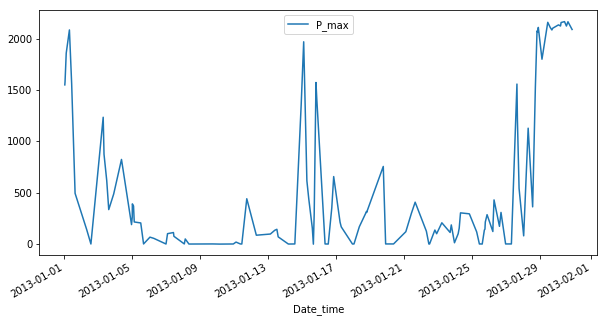

In [78]:
# plotting the trend of turbine R80711 P_max for month of january

jan_power.plot(x='Date_time', y='P_max', figsize=(10, 5))

### Find missing values

A dataset with missing values will not be usable for fitting and testing a model. Fill in missing values in a way suitable for the model.

In [79]:
# check for missing values in the data, i have done this in previous steps

data.isnull().sum()

Unnamed: 0               0
Wind_turbine_name        0
Date_time                0
Ba_avg                   0
Ba_min                   0
Ba_max                   0
Ba_std                   0
Rt_avg                   0
Rt_min                   0
Rt_max                   0
Rt_std                   0
DCs_avg                  0
DCs_min                  0
DCs_max                  0
DCs_std                  0
Cm_avg                   0
Cm_min                   0
Cm_max                   0
Cm_std                   0
P_avg                    0
P_min                    0
P_max                    0
P_std                    0
Q_avg                    0
Q_min                    0
Q_max                    0
Q_std                    0
S_avg                    0
S_min                    0
S_max                    0
                     ...  
Nf_max                   0
Nf_std                   0
Nu_avg                   0
Nu_min                   0
Nu_max                   0
Nu_std                   0
R

In [80]:
data.head()

,Unnamed: 0,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,804808,R80711,2013-04-06 14:20:00,-0.940000,-0.950000,-0.940000,0.0,10.59,10.000000,11.0,...,NaN,NaN,358.870000,NaN,NaN,NaN,351.670010,NaN,NaN,NaN
1,732424,R80711,2015-12-22 14:30:00,-0.990000,-0.990000,-0.990000,0.0,17.00,17.000000,17.0,...,NaN,NaN,195.190000,NaN,NaN,NaN,196.710010,NaN,NaN,NaN
2,312987,R80711,2016-03-20 20:40:00,-0.990000,-0.990000,-0.990000,0.0,12.88,12.000000,13.0,...,NaN,NaN,44.849998,NaN,NaN,NaN,44.849998,NaN,NaN,NaN
3,68152,R80711,2016-01-09 01:00:00,45.000000,45.000000,45.000000,0.0,12.95,12.000000,13.0,...,NaN,NaN,243.020000,NaN,NaN,NaN,243.020000,NaN,NaN,NaN
4,231878,R80721,2014-12-14 13:20:00,44.990002,44.990002,44.990002,0.0,16.99,16.110001,17.0,...,NaN,NaN,195.060000,NaN,NaN,NaN,308.239990,NaN,NaN,NaN


In [81]:
# using Dropna to remove a row or a column from a dataframe which has a NaN or no values in it.

data = data.dropna(axis='columns')

In [82]:
data.head()

,Unnamed: 0,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,...,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Wa_c_avg,Na_c_avg
0,804808,R80711,2013-04-06 14:20:00,-0.940000,-0.950000,-0.940000,0.0,10.59,10.000000,11.0,...,25.129999,25.100000,25.299999,0.07,2921.1001,2102.1599,3734.0701,420.45999,358.870000,351.670010
1,732424,R80711,2015-12-22 14:30:00,-0.990000,-0.990000,-0.990000,0.0,17.00,17.000000,17.0,...,28.620001,28.500000,28.750000,0.09,3057.7900,1855.3000,3908.2400,379.53000,195.190000,196.710010
2,312987,R80711,2016-03-20 20:40:00,-0.990000,-0.990000,-0.990000,0.0,12.88,12.000000,13.0,...,22.290001,22.200001,22.299999,0.02,1709.0400,1140.3800,2537.3301,259.03000,44.849998,44.849998
3,68152,R80711,2016-01-09 01:00:00,45.000000,45.000000,45.000000,0.0,12.95,12.000000,13.0,...,18.530001,18.500000,18.600000,0.04,0.0000,0.0000,0.0000,0.00000,243.020000,243.020000
4,231878,R80721,2014-12-14 13:20:00,44.990002,44.990002,44.990002,0.0,16.99,16.110001,17.0,...,18.420000,18.400000,18.500000,0.03,0.0000,0.0000,0.0000,0.00000,195.060000,308.239990


In [83]:
data.shape

(25000, 121)

data shape has changed from previous (25000, 135) to (25000, 121)

### Split dataset into predictor and target matrices

In [84]:
# Values of attributes

dataset = data.drop(['Date_time','Wind_turbine_name','P_avg', 'P_min', 'P_max', 'P_std'], axis=1)
X = dataset.values

# Values of target

y = data['P_avg'].values

In [85]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [86]:
number_features = len(dataset.columns)

### Dimension Reduction with PCA

The dataset we have it quite huge. We need to select features to use for our analysis of the active power. To discover the principal features, we can principal component analysis. First split the data into predictor and target variables. PCA allows you to reduce the number of you predictors, and to decorrelate them especially for features that have a direct relationship like apparent power, reactive power and active power.

In [87]:
pca=PCA(n_components=number_features)                                    

pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=115, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [88]:
PCA(copy=True, n_components=None, whiten=False)
pca.components_

array([[-9.99999671e-01, -5.49280189e-06, -5.41721495e-06, ...,
         3.69267531e-05,  4.48804453e-06,  3.02889184e-06],
       [ 8.00319369e-04, -2.44164872e-03, -2.37805920e-03, ...,
         6.98423319e-02,  5.14542520e-04,  3.37331701e-04],
       [-1.00294893e-04,  6.69508116e-03,  6.00714597e-03, ...,
         2.13685550e-01,  6.53203692e-03,  6.69161861e-03],
       ...,
       [-3.38220771e-10, -4.02402649e-04,  1.04188371e-04, ...,
        -2.08335754e-05, -2.52822432e-06,  2.94084601e-06],
       [-3.27141061e-10,  5.54767410e-05, -1.47938019e-04, ...,
        -1.35127511e-05, -9.31176794e-07, -3.27974198e-07],
       [-9.34042409e-11,  2.70912873e-05, -3.10461076e-05, ...,
         4.52823991e-06,  3.56956473e-06, -1.50071465e-06]])

### Plot the variance

In [89]:
pca.explained_variance_ratio_

array([9.99352338e-01, 6.01679325e-04, 2.21244236e-05, 1.32383126e-05,
       5.26468616e-06, 2.57377173e-06, 8.81644430e-07, 7.87497832e-07,
       2.39553096e-07, 1.66169347e-07, 1.38407122e-07, 1.12009219e-07,
       1.08881475e-07, 6.27412830e-08, 6.04159320e-08, 3.58443814e-08,
       3.06317207e-08, 2.55267848e-08, 1.96253045e-08, 1.76897653e-08,
       1.71231515e-08, 1.60561063e-08, 9.68891503e-09, 7.15425368e-09,
       7.00960262e-09, 6.74456072e-09, 5.56250986e-09, 4.90982534e-09,
       3.25010224e-09, 3.01723624e-09, 2.54346423e-09, 2.16169105e-09,
       1.89322523e-09, 1.26239931e-09, 1.20575528e-09, 1.16616603e-09,
       6.59694158e-10, 4.82906121e-10, 3.94495684e-10, 3.42015145e-10,
       2.62630787e-10, 2.60556089e-10, 2.12034399e-10, 1.89205109e-10,
       1.68010999e-10, 1.65028872e-10, 1.48099600e-10, 1.40405454e-10,
       1.19483355e-10, 9.76712713e-11, 7.00163896e-11, 4.56767587e-11,
       3.92391658e-11, 3.60501782e-11, 3.18589194e-11, 2.95726361e-11,
      

In [90]:
pca.explained_variance_

array([5.87903459e+10, 3.53958602e+07, 1.30154548e+06, 7.78789371e+05,
       3.09713310e+05, 1.51410993e+05, 5.18657725e+04, 4.63272743e+04,
       1.40925366e+04, 9.77548458e+03, 8.14227603e+03, 6.58932836e+03,
       6.40532805e+03, 3.69097223e+03, 3.55417544e+03, 2.10866929e+03,
       1.80201655e+03, 1.50170110e+03, 1.15452619e+03, 1.04066142e+03,
       1.00732841e+03, 9.44555795e+02, 5.69983823e+02, 4.20873632e+02,
       4.12364035e+02, 3.96772032e+02, 3.27233815e+02, 2.88837399e+02,
       1.91198467e+02, 1.77499322e+02, 1.49628050e+02, 1.27168927e+02,
       1.11375500e+02, 7.42649909e+01, 7.09327105e+01, 6.86037361e+01,
       3.88087827e+01, 2.84086171e+01, 2.32075684e+01, 2.01202198e+01,
       1.54501613e+01, 1.53281100e+01, 1.24736544e+01, 1.11306427e+01,
       9.88382611e+00, 9.70839224e+00, 8.71246946e+00, 8.25983481e+00,
       7.02902022e+00, 5.74584919e+00, 4.11895545e+00, 2.68709277e+00,
       2.30837918e+00, 2.12077599e+00, 1.87421074e+00, 1.73971225e+00,
      

In [91]:
variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance

array([ 99.9, 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. ])

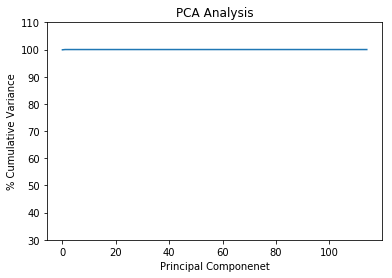

In [92]:
plt.title('PCA Analysis')
plt.ylabel('% Cumulative Variance')
plt.xlabel('Principal Componenet')
plt.ylim(30,110)
plt.style.context('seaborn-whitegrid')


plt.plot(variance)

### Random Forest with PCA

Construct a PCA and Random Forest Regressor pipeline. A pipeline is a term for the processing of data until it reaches a form that is usable for the machine learning algorithm. Now there is an actual pipeline module you'll need to use, that streamlines the process of dimension reduction and application of the machine learning algorithm, in this case the random forest regression model. For now, use the first two principal components to construct the pipeline.

In [51]:
# create model with 100 decision trees
rf = RandomForestRegressor(n_estimators=100, random_state = 42) 

# fit model with the training data
rf.fit(X_train, y_train); 

In [118]:
# Score
rf.score(X_test, y_test)

0.9999919829746312

In [119]:
y_preds = rf.predict(X_test)

In [121]:
errors = abs(y_preds - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.61 degrees.


In [122]:
mape = []
for i in range(len(errors)):
    if y_test[i] != 0.0:
        mape.append(100*(abs(errors[i]/y_test[i])))
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy: 96.21 %.


### Plot the principal components

Select the first two components and display them. As rule of thumb, the first to components are selected as they are easier to display in a 2-dimensions.

In [123]:
# "rule of thumb"
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

logistic = linear_model.LogisticRegression()
pipeline = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

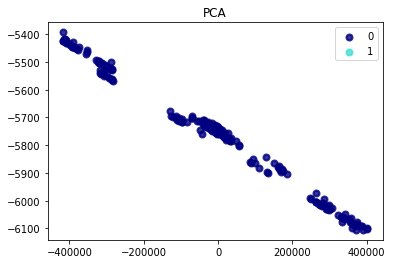

In [124]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], [0, 1]):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

plt.show()

### Split dataset in training and test sets

Split the data into training and test sets and use the pipeline to fit and test the model.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [137]:
pipeline.fit(X_train, y_train)

/Users/seuntoyobo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

### Evaluate the results

Using the `sklearn.metrics` moduel determine the accuracy score, i.e., the coefficient of determination $R^2$ of the prediction.

In [115]:
from sklearn.metrics import r2_score

In [129]:
score = r2_score(y_test, y_preds)

In [130]:
score

0.9999919829746312

### References

Referred to for determination of input features to predict power output: [Forecasting Wind Power](https://lucdemortier.github.io/articles/17/WindPower).

[Selecting good features – Part IV: stability selection, RFE and everything side by side](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)